In [51]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score

In [26]:
class CFG:
    SEED = 42

In [27]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정

In [28]:
train = pd.read_csv('open/train.csv')
test = pd.read_csv('open/test.csv')

In [29]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x

In [30]:
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

In [31]:
train_x.shape

(262, 19)

In [32]:
train_y = pd.DataFrame(train_y)

In [33]:
# train테이터 나누기
seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=test_size, random_state=seed)

#### Data Pre-processing
#### Label-Encoding

In [45]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

In [46]:
snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)

In [47]:
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

LabelEncoder()

In [48]:
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

## Model Fit

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

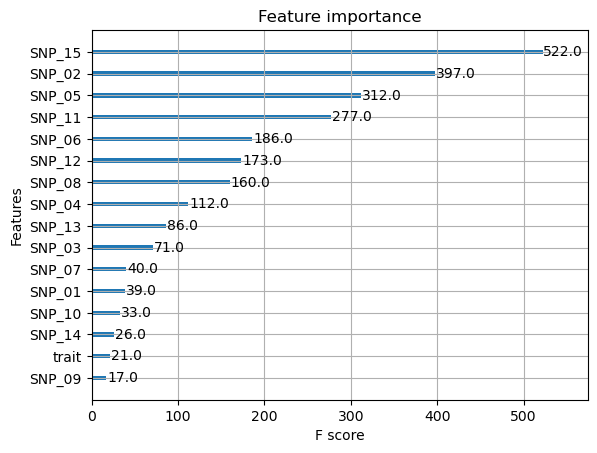

In [49]:
clf = XGBClassifier(booster='gbtree', random_state=CFG.SEED,
                    gamma=1e-06, max_depth=64,
                    min_child_weight=1,
                   n_estimators=500)


model = clf.fit(train_x, train_y)

plot_importance(model)

### Inference

In [53]:
preds = clf.predict(test_x)
print(preds)

[0 1 2 1 0 1 2 1 0 0 2 1 2 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 2 0 1 2
 1 1 2 0 1 2 1 1 1 1 2 1 2 0 1 0 1 1 1 2 0 1 2 0 1 2 2 2 0 1 0 0 1 1 1 0 0
 2 1 2 1 1 1 2 1 0 1 1 1 1 1 2 0 1 1 2 1 1 2 0 1 0 2 0 1 1 2 0 0 2 1 0 1 2
 1 1 1 1 0 0 2 1 1 0 1 1 2 2 1 2 1 0 1 0 0 1 1 1 2 0 0 1 0 0 0 2 1 1 1 0 1
 2 0 0 1 0 1 1 0 0 1 2 0 1 2 2 1 0 0 2 1 1 0 1 2 2 1 1]


ValueError: multi_class must be in ('ovo', 'ovr')

In [13]:
submit = pd.read_csv('open/sample_submission.csv')

In [14]:
submit['class'] = class_le.inverse_transform(preds)

In [15]:
submit.to_csv('./answer/xgb_submit6.csv', index=False)